## Grid Search 

Grid search is an exhaustive search by trying all possible combinations of the parameters of interest.

### Simple Grid Search

This is a simple grid search which is a naive solution which checks all the possible combinations using loops.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=0)

print("Size of training set: {} size of test set: {}".format(
X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: # All combinations of gamma 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: # All combinations of C
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train) # Fitting for a particular combinations 

        score = svm.score(X_test, y_test)

        if score > best_score: # If the score we find is better than the maximum so far, we consider this as the best score 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


However, this generates a combinations which has the maximum testing accuracy, it may lead to overfitting as we desperately trying to find the right combination which gives us the best result (similar argument is used in making Decision Trees and why we should not make them too long)

In [6]:
import mglearn

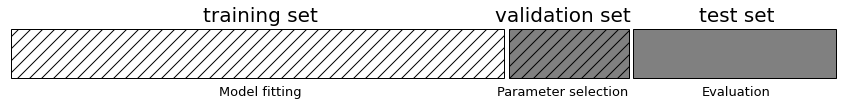

In [7]:
mglearn.plots.plot_threefold_split()

In [8]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(
iris.data, iris.target, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
X_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        score = svm.score(X_valid, y_valid)

        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)

print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92
